In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import pandas as pd

loaded_files = files.upload()

Saving 27_B_17834.csv to 27_B_17834.csv


In [ ]:
data_table = pd.read_csv('27_B_17834.csv', sep=';')
data_table['X'] = data_table['X'].str.replace(',', '.').astype(float)
data_table['Y'] = data_table['Y'].str.replace(',', '.').astype(float)
print(data_table)

          X      Y
0     7.084  7.959
1    -0.759  5.781
2     6.736  4.640
3     7.899  7.361
4     0.297  5.932
...     ...    ...
9895  5.910 -1.384
9896  2.601  0.671
9897 -0.361  5.778
9898  7.805  6.691
9899  2.113  6.230

[9900 rows x 2 columns]


Переформатируем в двумерный массив numpy

In [ ]:
numeric_array = data_table.to_numpy()
print(numeric_array)

[[ 7.084  7.959]
 [-0.759  5.781]
 [ 6.736  4.64 ]
 ...
 [-0.361  5.778]
 [ 7.805  6.691]
 [ 2.113  6.23 ]]


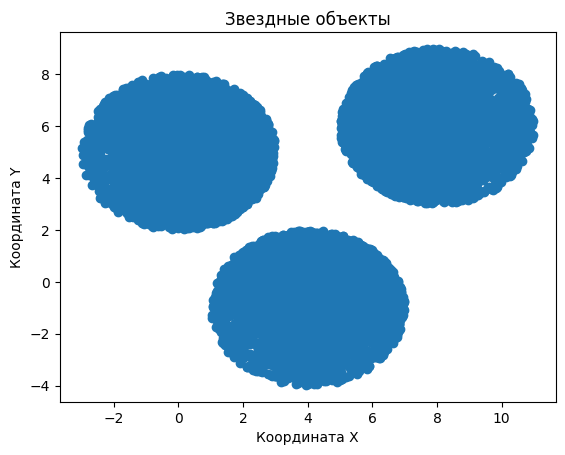

In [ ]:
plt.scatter(numeric_array[:, 0], numeric_array[:, 1])
plt.title("Звездные объекты")
plt.xlabel("Координата X")
plt.ylabel("Координата Y")
plt.show()

Метод кластеризации K-means использует алгоритм KMeans, который по умолчанию применяет евклидово расстояние для определения близости точек.

In [ ]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(numeric_array)

cluster_labels = kmeans_model.labels_ # Метки кластерной принадлежности
cluster_centroids = kmeans_model.cluster_centers_ # Координаты центров кластеров

Проверим корректность найденных центров, построив график

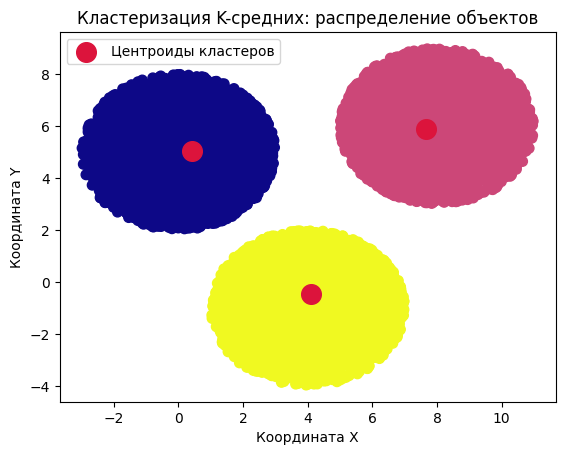

In [ ]:
plt.scatter(numeric_array[:, 0], numeric_array[:, 1], c=cluster_labels, s=50, cmap='plasma')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='crimson', s=200, label='Центроиды кластеров')
plt.title("Кластеризация K-средних: распределение объектов")
plt.xlabel("Координата X")
plt.ylabel("Координата Y")
plt.legend()
plt.show()

In [ ]:
print(f"Кластер 1: ({cluster_centroids[0, 0]:.2f} ; {cluster_centroids[0, 1]:.2f})")
print(f"Кластер 2: ({cluster_centroids[1, 0]:.2f} ; {cluster_centroids[1, 1]:.2f})")
print(f"Кластер 3: ({cluster_centroids[2, 0]:.2f} ; {cluster_centroids[2, 1]:.2f})")

Кластер 1: (0.43 ; 5.02)
Кластер 2: (7.65 ; 5.88)
Кластер 3: (4.11 ; -0.49)
